In [7]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')



ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [8]:
!pip install xgboost

In [2]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

> 1- Process the dataset

> 2- Make the deep neural network

> 3- Train the DNN

> 4- Test the DNN

> 5- Compare the result from the DNN to another ML algorithm

# 1. Processing the data

In [16]:
train, test = get_data()

In [17]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
def get_data():
    train_data_path = 'dataset/train_houseprice.csv'
    train = pd.read_csv(train_data_path)
    test_data_path = 'dataset/test_houseprice.csv'
    test = pd.read_csv(test_data_path)
    return train, test

def get_combined_data():
    train, test = get_data()

    target = train.SalePrice
    train.drop(['SalePrice'], axis = 1, inplace = True)

    combined = train.append(test)
    combined.reset_index(inplace = True)
    combined.drop(['index', 'Id'], inplace = True, axis = 1)
    return combined, target

train_data, test_data = get_data()
combined, target = get_combined_data()
    

In [32]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


> **Get columns that dont have any missing values**

In [33]:
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [34]:
num_cols = get_cols_with_no_nans(combined, 'num')
cat_cols = get_cols_with_no_nans(combined, 'no_num')

In [39]:
combined = combined[num_cols + cat_cols]

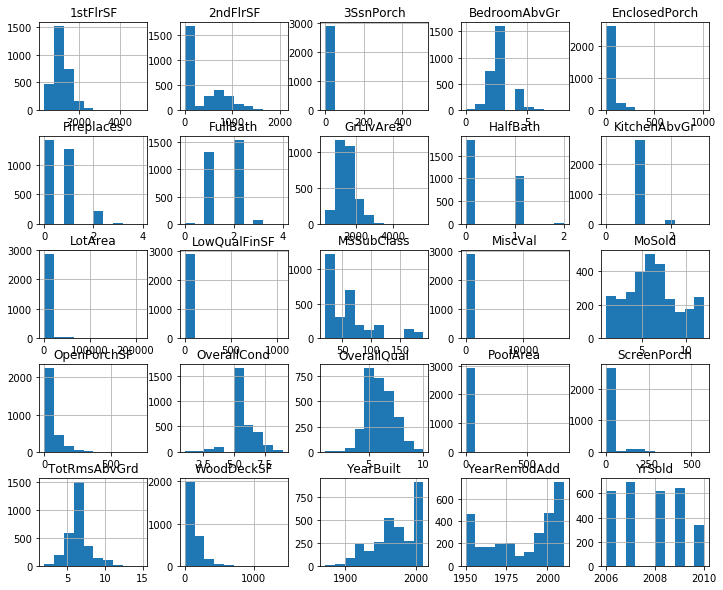

In [41]:
combined.hist(figsize = (12, 10))
plt.show()

> **Correlation between the features**

In [44]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

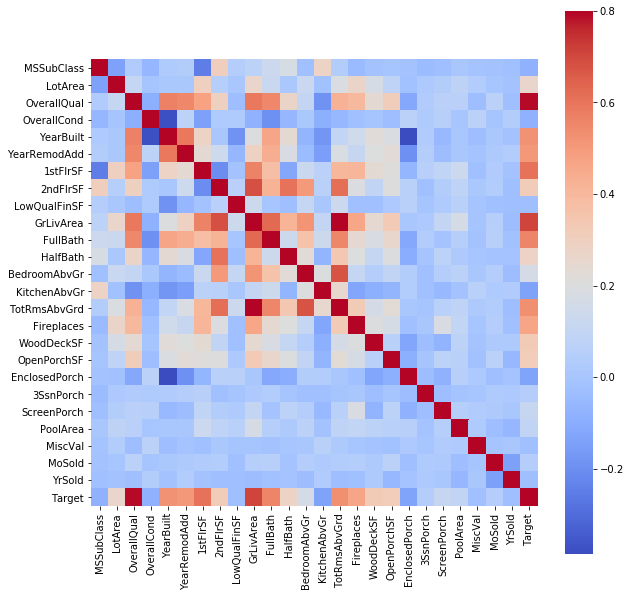

In [51]:
Corr_mat = train_data.corr()
plt.figure(figsize = (10, 10))
sb.heatmap(Corr_mat, vmax = 0.8, cmap='coolwarm', square = True)
plt.show()

> **Lets notice at some features are highly correlated with the Target**

> **Lets OneHotEncode the categorical Feature**

In [77]:
def oneHotEncode(df, colNames) :
    for col in colNames :
        if (df[col].dtypes == np.dtype('object')):
            dummies = pd.get_dummies(df[col], prefix = col)
            df = pd.concat([df, dummies], axis = 1)
            
            df.drop([col], axis = 1, inplace = True)
    return df


In [78]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))


There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


> **Split back combined data to training data and test data**

In [81]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]
    return train, test
train,test = split_combined()

# 2. Making the Deep Neural Network

With following step :

1. Define sequential mode

2. Add some dense layers

3. Use 'relu' as the activation function for the hidden layers

4. Use a 'normal' initializer as the kernal_intializer


<font color = red> initializer define the way to set the initial random weights of Keras Layers </font>

5. Use mean_absolute_error as a loss function

6. Define output layer with only one node

7. Use 'linear' as the activation function for the output layer

In [97]:
NN_model = Sequential()

# Input Layer
NN_model.add(Dense(128, kernel_initializer = 'normal',
             input_dim = train.shape[1], activation = 'relu'))

In [98]:
# Hidden Layer
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
NN_model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))

In [99]:
# Output Layer
NN_model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))

In [100]:
# Compile the NN
NN_model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
NN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               19200     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


> **Define Checkpoint Callbacks**

In [101]:
checkpoint_name = 'NN_weights/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

# 3. Training the model

In [102]:
NN_model.fit(train, target, epochs = 500, batch_size = 32,
             validation_split=0.2, callbacks = callbacks_list)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 221us/step - loss: 125684.2785 - mean_absolute_error: 125684.2891 - val_loss: 58752.4465 - val_mean_absolute_error: 58752.4453

Epoch 00001: val_loss improved from inf to 58752.44649, saving model to NN_weights/Weights-001--58752.44649.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 100us/step - loss: 52518.7865 - mean_absolute_error: 52518.7891 - val_loss: 47113.7287 - val_mean_absolute_error: 47113.7305

Epoch 00002: val_loss improved from 58752.44649 to 47113.72870, saving model to NN_weights/Weights-002--47113.72870.hdf5
Epoch 3/500
1168/1168 [==============================] - 0s 115us/step - loss: 44546.9991 - mean_absolute_error: 44547.0000 - val_loss: 43909.0068 - val_mean_absolute_error: 43909.0078

Epoch 00003: val_loss improved from 47113.72870 to 43909.00680, saving model to NN_weights/Weights-003--43909.00680.hdf5
Epoch 4/500
1168/1168 [===============

1168/1168 [==============================] - 0s 153us/step - loss: 30091.2541 - mean_absolute_error: 30091.2578 - val_loss: 30442.2478 - val_mean_absolute_error: 30442.2461

Epoch 00061: val_loss improved from 31261.60311 to 30442.24775, saving model to NN_weights/Weights-061--30442.24775.hdf5
Epoch 62/500
1168/1168 [==============================] - 0s 141us/step - loss: 27461.8931 - mean_absolute_error: 27461.8926 - val_loss: 30664.5727 - val_mean_absolute_error: 30664.5723

Epoch 00062: val_loss did not improve from 30442.24775
Epoch 63/500
1168/1168 [==============================] - 0s 166us/step - loss: 28200.7658 - mean_absolute_error: 28200.7676 - val_loss: 31116.7536 - val_mean_absolute_error: 31116.7539

Epoch 00063: val_loss did not improve from 30442.24775
Epoch 64/500
1168/1168 [==============================] - 0s 135us/step - loss: 29300.4563 - mean_absolute_error: 29300.4512 - val_loss: 39397.9600 - val_mean_absolute_error: 39397.9570

Epoch 00064: val_loss did not impr

Epoch 92/500
1168/1168 [==============================] - 0s 123us/step - loss: 23771.7746 - mean_absolute_error: 23771.7754 - val_loss: 27614.6157 - val_mean_absolute_error: 27614.6152

Epoch 00092: val_loss did not improve from 26677.84626
Epoch 93/500
1168/1168 [==============================] - 0s 141us/step - loss: 24150.0880 - mean_absolute_error: 24150.0898 - val_loss: 26267.7142 - val_mean_absolute_error: 26267.7148

Epoch 00093: val_loss improved from 26677.84626 to 26267.71420, saving model to NN_weights/Weights-093--26267.71420.hdf5
Epoch 94/500
1168/1168 [==============================] - 0s 126us/step - loss: 22996.8577 - mean_absolute_error: 22996.8574 - val_loss: 27425.3742 - val_mean_absolute_error: 27425.3750

Epoch 00094: val_loss did not improve from 26267.71420
Epoch 95/500
1168/1168 [==============================] - 0s 119us/step - loss: 23299.8908 - mean_absolute_error: 23299.8906 - val_loss: 30648.9401 - val_mean_absolute_error: 30648.9375

Epoch 00095: val_loss


Epoch 00156: val_loss did not improve from 21606.44098
Epoch 157/500
1168/1168 [==============================] - 0s 95us/step - loss: 19361.0702 - mean_absolute_error: 19361.0664 - val_loss: 21904.2002 - val_mean_absolute_error: 21904.2012

Epoch 00157: val_loss did not improve from 21606.44098
Epoch 158/500
1168/1168 [==============================] - 0s 117us/step - loss: 19421.2161 - mean_absolute_error: 19421.2148 - val_loss: 22445.5138 - val_mean_absolute_error: 22445.5137

Epoch 00158: val_loss did not improve from 21606.44098
Epoch 159/500
1168/1168 [==============================] - 0s 96us/step - loss: 20082.0348 - mean_absolute_error: 20082.0352 - val_loss: 21921.2141 - val_mean_absolute_error: 21921.2148

Epoch 00159: val_loss did not improve from 21606.44098
Epoch 160/500
1168/1168 [==============================] - 0s 107us/step - loss: 19336.9549 - mean_absolute_error: 19336.9551 - val_loss: 20945.9193 - val_mean_absolute_error: 20945.9219

Epoch 00160: val_loss improve


Epoch 00189: val_loss did not improve from 20551.84669
Epoch 190/500
1168/1168 [==============================] - 0s 124us/step - loss: 18311.0959 - mean_absolute_error: 18311.0977 - val_loss: 22196.2514 - val_mean_absolute_error: 22196.2520

Epoch 00190: val_loss did not improve from 20551.84669
Epoch 191/500
1168/1168 [==============================] - 0s 95us/step - loss: 17810.8841 - mean_absolute_error: 17810.8828 - val_loss: 21796.0400 - val_mean_absolute_error: 21796.0391

Epoch 00191: val_loss did not improve from 20551.84669
Epoch 192/500
1168/1168 [==============================] - 0s 103us/step - loss: 17591.2389 - mean_absolute_error: 17591.2383 - val_loss: 25056.0569 - val_mean_absolute_error: 25056.0547

Epoch 00192: val_loss did not improve from 20551.84669
Epoch 193/500
1168/1168 [==============================] - 0s 93us/step - loss: 20337.2861 - mean_absolute_error: 20337.2852 - val_loss: 21415.8579 - val_mean_absolute_error: 21415.8574

Epoch 00193: val_loss did not

1168/1168 [==============================] - 0s 105us/step - loss: 17697.1238 - mean_absolute_error: 17697.1230 - val_loss: 20992.3037 - val_mean_absolute_error: 20992.3027

Epoch 00256: val_loss did not improve from 19131.18632
Epoch 257/500
1168/1168 [==============================] - 0s 95us/step - loss: 17538.4674 - mean_absolute_error: 17538.4688 - val_loss: 21449.6373 - val_mean_absolute_error: 21449.6367

Epoch 00257: val_loss did not improve from 19131.18632
Epoch 258/500
1168/1168 [==============================] - 0s 117us/step - loss: 16896.8061 - mean_absolute_error: 16896.8066 - val_loss: 19646.3086 - val_mean_absolute_error: 19646.3105

Epoch 00258: val_loss did not improve from 19131.18632
Epoch 259/500
1168/1168 [==============================] - 0s 94us/step - loss: 16605.4914 - mean_absolute_error: 16605.4902 - val_loss: 23267.1231 - val_mean_absolute_error: 23267.1230

Epoch 00259: val_loss did not improve from 19131.18632
Epoch 260/500
1168/1168 [===================

1168/1168 [==============================] - 0s 117us/step - loss: 17247.9959 - mean_absolute_error: 17247.9980 - val_loss: 20605.2894 - val_mean_absolute_error: 20605.2891

Epoch 00290: val_loss did not improve from 19131.18632
Epoch 291/500
1168/1168 [==============================] - 0s 93us/step - loss: 17541.8602 - mean_absolute_error: 17541.8574 - val_loss: 22475.7419 - val_mean_absolute_error: 22475.7402

Epoch 00291: val_loss did not improve from 19131.18632
Epoch 292/500
1168/1168 [==============================] - 0s 105us/step - loss: 16644.2221 - mean_absolute_error: 16644.2227 - val_loss: 21536.5235 - val_mean_absolute_error: 21536.5215

Epoch 00292: val_loss did not improve from 19131.18632
Epoch 293/500
1168/1168 [==============================] - 0s 96us/step - loss: 16059.7860 - mean_absolute_error: 16059.7842 - val_loss: 19883.6900 - val_mean_absolute_error: 19883.6875

Epoch 00293: val_loss did not improve from 19131.18632
Epoch 294/500
1168/1168 [===================

1168/1168 [==============================] - 0s 126us/step - loss: 16138.4422 - mean_absolute_error: 16138.4414 - val_loss: 22306.5172 - val_mean_absolute_error: 22306.5156

Epoch 00324: val_loss did not improve from 19131.18632
Epoch 325/500
1168/1168 [==============================] - 0s 109us/step - loss: 16110.4157 - mean_absolute_error: 16110.4141 - val_loss: 19365.2251 - val_mean_absolute_error: 19365.2285

Epoch 00325: val_loss did not improve from 19131.18632
Epoch 326/500
1168/1168 [==============================] - 0s 114us/step - loss: 15656.0752 - mean_absolute_error: 15656.0752 - val_loss: 21461.0087 - val_mean_absolute_error: 21461.0098

Epoch 00326: val_loss did not improve from 19131.18632
Epoch 327/500
1168/1168 [==============================] - 0s 93us/step - loss: 16053.5760 - mean_absolute_error: 16053.5771 - val_loss: 20257.8969 - val_mean_absolute_error: 20257.8965

Epoch 00327: val_loss did not improve from 19131.18632
Epoch 328/500
1168/1168 [==================

1168/1168 [==============================] - 0s 124us/step - loss: 16606.7379 - mean_absolute_error: 16606.7363 - val_loss: 25698.7095 - val_mean_absolute_error: 25698.7109

Epoch 00357: val_loss did not improve from 18905.45735
Epoch 358/500
1168/1168 [==============================] - 0s 96us/step - loss: 15907.7615 - mean_absolute_error: 15907.7607 - val_loss: 21160.8494 - val_mean_absolute_error: 21160.8496

Epoch 00358: val_loss did not improve from 18905.45735
Epoch 359/500
1168/1168 [==============================] - 0s 105us/step - loss: 16482.9935 - mean_absolute_error: 16482.9941 - val_loss: 20566.8233 - val_mean_absolute_error: 20566.8223

Epoch 00359: val_loss did not improve from 18905.45735
Epoch 360/500
1168/1168 [==============================] - 0s 98us/step - loss: 15623.7026 - mean_absolute_error: 15623.7041 - val_loss: 20008.9243 - val_mean_absolute_error: 20008.9238

Epoch 00360: val_loss did not improve from 18905.45735
Epoch 361/500
1168/1168 [===================

1168/1168 [==============================] - 0s 126us/step - loss: 15475.6369 - mean_absolute_error: 15475.6357 - val_loss: 19966.5254 - val_mean_absolute_error: 19966.5254

Epoch 00424: val_loss did not improve from 18779.85295
Epoch 425/500
1168/1168 [==============================] - 0s 121us/step - loss: 15093.5611 - mean_absolute_error: 15093.5596 - val_loss: 21059.3183 - val_mean_absolute_error: 21059.3203

Epoch 00425: val_loss did not improve from 18779.85295
Epoch 426/500
1168/1168 [==============================] - 0s 137us/step - loss: 14675.7031 - mean_absolute_error: 14675.7021 - val_loss: 19664.3520 - val_mean_absolute_error: 19664.3535

Epoch 00426: val_loss did not improve from 18779.85295
Epoch 427/500
1168/1168 [==============================] - 0s 107us/step - loss: 14595.0491 - mean_absolute_error: 14595.0498 - val_loss: 21315.9573 - val_mean_absolute_error: 21315.9551

Epoch 00427: val_loss did not improve from 18779.85295
Epoch 428/500
1168/1168 [=================

1168/1168 [==============================] - 0s 114us/step - loss: 14388.1424 - mean_absolute_error: 14388.1436 - val_loss: 19580.3726 - val_mean_absolute_error: 19580.3711

Epoch 00458: val_loss did not improve from 18779.85295
Epoch 459/500
1168/1168 [==============================] - 0s 116us/step - loss: 14520.8234 - mean_absolute_error: 14520.8232 - val_loss: 20192.7907 - val_mean_absolute_error: 20192.7891

Epoch 00459: val_loss did not improve from 18779.85295
Epoch 460/500
1168/1168 [==============================] - 0s 114us/step - loss: 14915.6992 - mean_absolute_error: 14915.7002 - val_loss: 21671.7771 - val_mean_absolute_error: 21671.7773

Epoch 00460: val_loss did not improve from 18779.85295
Epoch 461/500
1168/1168 [==============================] - 0s 105us/step - loss: 14167.8907 - mean_absolute_error: 14167.8906 - val_loss: 20150.6208 - val_mean_absolute_error: 20150.6211

Epoch 00461: val_loss did not improve from 18779.85295
Epoch 462/500
1168/1168 [=================


Epoch 00491: val_loss did not improve from 18779.85295
Epoch 492/500
1168/1168 [==============================] - 0s 116us/step - loss: 13654.6383 - mean_absolute_error: 13654.6387 - val_loss: 19948.7066 - val_mean_absolute_error: 19948.7051

Epoch 00492: val_loss did not improve from 18779.85295
Epoch 493/500
1168/1168 [==============================] - 0s 117us/step - loss: 14441.4854 - mean_absolute_error: 14441.4844 - val_loss: 20063.3754 - val_mean_absolute_error: 20063.3770

Epoch 00493: val_loss did not improve from 18779.85295
Epoch 494/500
1168/1168 [==============================] - 0s 111us/step - loss: 15553.0171 - mean_absolute_error: 15553.0156 - val_loss: 19295.6535 - val_mean_absolute_error: 19295.6543

Epoch 00494: val_loss did not improve from 18779.85295
Epoch 495/500
1168/1168 [==============================] - 0s 108us/step - loss: 13543.0080 - mean_absolute_error: 13543.0078 - val_loss: 21782.1577 - val_mean_absolute_error: 21782.1582

Epoch 00495: val_loss did n

# 4. Testing model

In [105]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

predictions = NN_model.predict(test)


In [122]:
len(NN_model.weights)

10